# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [3]:
fraud.isnull().sum()


distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

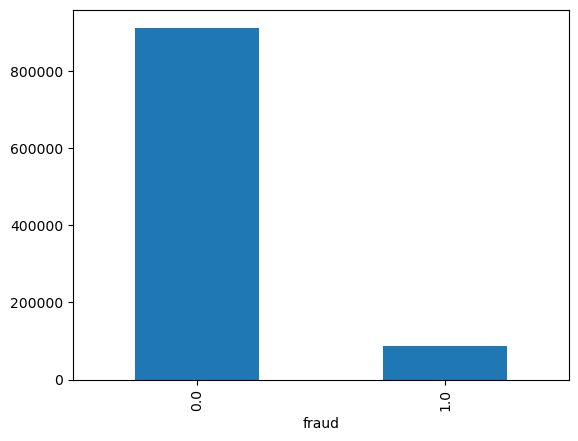

In [4]:
import matplotlib.pyplot as plt
fraud_plot = fraud["fraud"].value_counts()
fraud_plot.plot(kind="bar")
plt.show()

This is imbalanced data points of our target variables

In [5]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.142294,-0.061333,-0.373354,0.366125,1.361382,-0.33449,-1.363705
1,-0.284490,-0.120882,-0.478126,0.366125,1.361382,-0.33449,0.733296
2,-0.302084,-0.176753,-0.310982,0.366125,1.361382,-0.33449,0.733296
3,-0.305992,-0.172047,0.035258,0.366125,1.361382,-0.33449,-1.363705
4,-0.385432,-0.129256,-0.244266,-2.731308,-0.734548,-0.33449,0.733296


In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [8]:
log_reg.score(X_test_scaled, y_test)


0.958516

In [9]:
from sklearn.metrics import classification_report
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228210
         1.0       0.89      0.60      0.72     21790

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



Oversampling 

In [19]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [20]:
train["fraud"] = y_train.values


In [21]:
yes_fraud = fraud[fraud["fraud"] == 1]
no_fraud = fraud[fraud["fraud"] == 0]

In [22]:
from sklearn.utils import resample
yes_fraud_oversampled = resample(yes_fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [23]:
fraud_over = pd.concat([yes_fraud_oversampled, no_fraud])
fraud_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
781436,17.156979,1.032954,17.862495,1.0,1.0,0.0,1.0,1.0
498904,70.424731,1.023682,9.211348,1.0,0.0,0.0,1.0,1.0
488212,10.629216,0.932118,4.317376,1.0,1.0,0.0,1.0,1.0
525384,3.316171,5.486249,36.540108,1.0,1.0,0.0,1.0,1.0
244343,209.444337,14.344290,4.585371,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


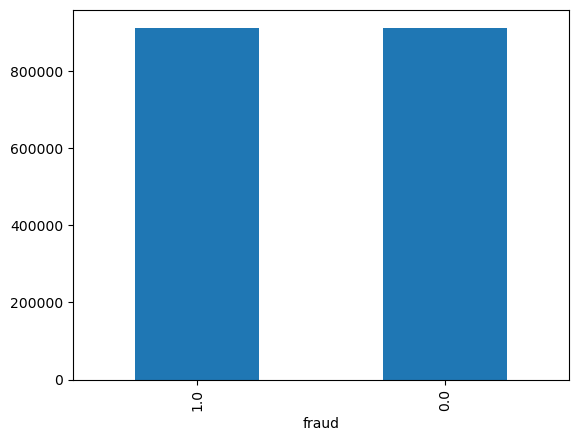

In [28]:
fraud_over_plot = fraud_over["fraud"].value_counts()
fraud_over_plot.plot(kind="bar")
plt.show()

In [29]:
X_train_over = fraud_over.drop(columns = ["fraud"])
y_train_over = fraud_over["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

/Users/hoangleduc/ironhack/ih-labs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/hoangleduc/ironhack/ih-labs/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    228210
         1.0       0.40      0.36      0.38     21790

    accuracy                           0.90    250000
   macro avg       0.67      0.65      0.66    250000
weighted avg       0.89      0.90      0.89    250000



Undersampling

In [35]:
no_fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(yes_fraud),
                                    random_state=0)
no_fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
463944,9.454805,0.036985,3.224905,1.0,1.0,0.0,1.0,0.0
126410,2.194561,2.267504,0.064518,1.0,1.0,0.0,1.0,0.0
184900,28.035257,2.365139,0.182393,1.0,0.0,0.0,1.0,0.0
448245,16.426634,22.357581,0.724242,1.0,0.0,0.0,1.0,0.0
915523,25.267437,2.353905,0.599941,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
235513,125.266276,1.563355,3.501959,1.0,1.0,0.0,0.0,0.0
570206,46.277378,0.086179,0.468331,1.0,0.0,0.0,1.0,0.0
178563,7.174844,0.013734,1.836446,1.0,0.0,0.0,0.0,0.0
966717,2.370398,0.321132,2.757089,1.0,0.0,0.0,1.0,0.0


In [36]:
fraud_under = pd.concat([no_fraud_undersampled, yes_fraud])
fraud_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
463944,9.454805,0.036985,3.224905,1.0,1.0,0.0,1.0,0.0
126410,2.194561,2.267504,0.064518,1.0,1.0,0.0,1.0,0.0
184900,28.035257,2.365139,0.182393,1.0,0.0,0.0,1.0,0.0
448245,16.426634,22.357581,0.724242,1.0,0.0,0.0,1.0,0.0
915523,25.267437,2.353905,0.599941,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


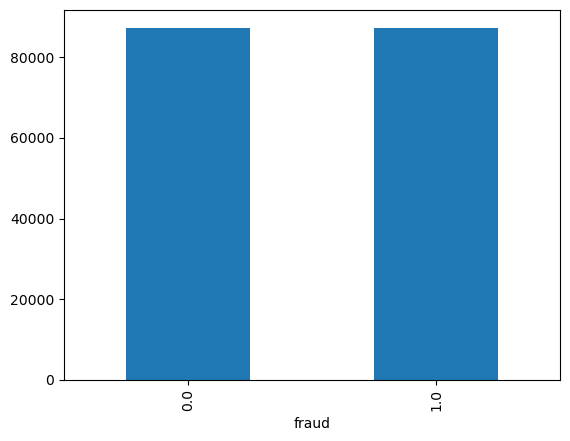

In [37]:
fraud_under_plot = fraud_under["fraud"].value_counts()
fraud_under_plot.plot(kind="bar")
plt.show()

In [39]:
X_train_under = fraud_under.drop(columns = ["fraud"])
y_train_under = fraud_under["fraud"]
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

/Users/hoangleduc/ironhack/ih-labs/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/hoangleduc/ironhack/ih-labs/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    228210
         1.0       0.38      0.28      0.32     21790

    accuracy                           0.90    250000
   macro avg       0.66      0.62      0.63    250000
weighted avg       0.88      0.90      0.89    250000



SMOTE


In [41]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)


In [43]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [44]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/Users/hoangleduc/ironhack/ih-labs/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228210
         1.0       0.57      0.95      0.72     21790

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

